# Understanding your Data
First we need to load our data and perform some basic analysis to understand it. This is called Exploratory Data Analysis in short EDA. We need pandas library for loading our data.

## Importing necessary libraries and moduls

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline # cizdirdigimiz grafikler jupyter notebook ile birlikte kayd ediliyor
plt.style.use('bmh')

In [2]:
train_data = pd.read_csv("DataSets/train.csv")
test_data = pd.read_csv("DataSets/test.csv")

## Exploratory Data Analysis (EDA)

In [356]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [357]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [358]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [359]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [360]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [361]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


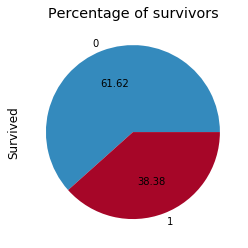

In [362]:
train_data["Survived"].value_counts().plot.pie(figsize=(4, 4),
                                          autopct='%.2f',
                                          title="Percentage of survivors",
                                          fontsize = 10)

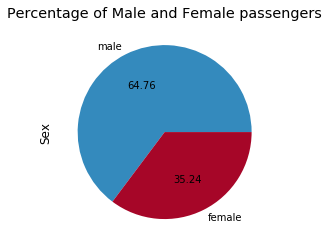

In [363]:
train_data["Sex"].value_counts().plot.pie(figsize=(4, 4),
                                     autopct='%.2f',
                                     title="Percentage of Male and Female passengers",
                                     fontsize = 10)

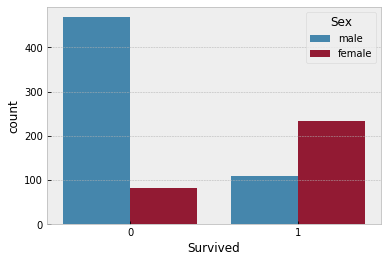

In [364]:
sns.countplot(x="Survived", hue="Sex", data=train_data)

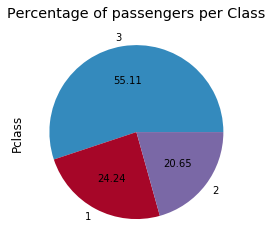

In [365]:
train_data["Pclass"].value_counts().plot.pie(figsize=(4, 4),
                                        autopct='%.2f',
                                        title="Percentage of passengers per Class",
                                        fontsize = 10)

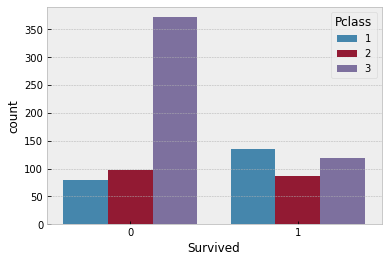

In [366]:
sns.countplot(x="Survived", hue="Pclass", data=train_data)

# Feature Engineering

## Passenger Class

In [367]:
train_data.groupby(["Pclass"])[["Survived"]].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [368]:
train_data.groupby(["Sex"], as_index=False)[["Survived"]].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Sex Column

In [369]:
## Assign Binary to Sex str
train_data['Sex'] = train_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

## Family Size
Next two columns are SibSp and Parch, which are not directly related to whether a person has survived or not. That is where the idea of creating a new feature came in. For each row/passenger, we will determine his/her family size by adding SibSp + Parch + 1(him/her self). Family size differs from a minimum of 1 to a maximum of 11, where the family size of 4 having the highest survival rate of 72%.

In [370]:
train_data.SibSp.value_counts(dropna=False).sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [371]:
train_data.Parch.value_counts(dropna=False).sort_index()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

In [372]:
train_data["FamilySize"] = train_data.SibSp + train_data.Parch + 1
train_data.FamilySize.value_counts().sort_index()

1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: FamilySize, dtype: int64

In [373]:
# we should do the same for the test_data.
test_data["FamilySize"] = test_data.SibSp + test_data.Parch + 1

In [374]:
train_data.groupby(["FamilySize"])[["Survived"]].mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [375]:
train_data.drop(["SibSp", "Parch"], axis=1, inplace=True)
test_data.drop(columns=["SibSp", "Parch"], inplace=True)

### single or family?

In [376]:
train_data["single"] = 0
test_data["single"] = 0

In [377]:
train_data.loc[train_data["FamilySize"] == 1 , ["single"] ] = 1
test_data.loc[test_data["FamilySize"] == 1 , ["single"] ] = 1

In [378]:
train_data.single.value_counts()

1    537
0    354
Name: single, dtype: int64

In [379]:
test_data.single.value_counts()

1    253
0    165
Name: single, dtype: int64

In [380]:
train_data.groupby(["single"])[["Survived"]].mean()

,Survived
single,
0,0.505650
1,0.303538


## Combining two dataframes for a better feature engineering

In [381]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,2,0


In [382]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single
0,892,3,"Kelly, Mr. James",1,34.5,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,NaN,S,2,0


In [383]:
cols = train_data.columns.to_list()

In [384]:
# a temporary column before joining two dataframes
test_data["Survived"] = 99

In [385]:
temp_df = test_data[cols]
temp_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single
0,892,99,3,"Kelly, Mr. James",1,34.5,330911,7.8292,NaN,Q,1,1
1,893,99,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,NaN,S,2,0


In [386]:
all_data = train_data.append(temp_df, ignore_index=True, sort=False)
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,S,1,1


## Embarked Column (C=Cherbourg; Q=Queenstown; S=Southampton)

In [387]:
train_data.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

There are 2 rows with missing values. Let's try to investigate them.

In [388]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single
61,62,1,1,"Icard, Miss. Amelie",0,38.0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,113572,80.0,B28,NaN,1,1


It is interesting that these 2 ladies have the same ticket number and same Cabin number. we have coded them as single before, but now we can clearly see that they are a family. Most probably Mother and daughter. So our feature engineering is helped us to see the data from different perspectives but is not %100 percent true assuming that they are single or not.

In [389]:
train_data[(train_data.Cabin == "B22") | (train_data.Cabin == "B23") |(train_data.Cabin == "B28")]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single
61,62,1,1,"Icard, Miss. Amelie",0,38.0,113572,80.0,B28,NaN,1,1
540,541,1,1,"Crosby, Miss. Harriet R",0,36.0,WE/P 5735,71.0,B22,S,3,0
745,746,0,1,"Crosby, Capt. Edward Gifford",1,70.0,WE/P 5735,71.0,B22,S,3,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,113572,80.0,B28,NaN,1,1


According to the results of grouping and checking price of the neighbor Cabins, we can assume that the two passengers probably embarked on "S=Southampton". 

In [390]:
train_data["Embarked"] = train_data.Embarked.fillna("S")

In [391]:
train_data.Embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [392]:
all_data["Embarked"] = all_data.Embarked.fillna("S")

## Ticket Column

In [393]:
ticket_count = all_data.Ticket.value_counts(dropna=False).to_dict()
ticket_count

{'CA. 2343': 11,
 'CA 2144': 8,
 '1601': 8,
 '347082': 7,
 '347077': 7,
 'S.O.C. 14879': 7,
 'PC 17608': 7,
 '3101295': 7,
 '382652': 6,
 '347088': 6,
 '19950': 6,
 '113781': 6,
 '113503': 5,
 '4133': 5,
 '220845': 5,
 'PC 17757': 5,
 '16966': 5,
 '349909': 5,
 'W./C. 6608': 5,
 '113760': 4,
 '17421': 4,
 '36928': 4,
 '2666': 4,
 'SC/Paris 2123': 4,
 'PC 17760': 4,
 'C.A. 33112': 4,
 'W./C. 6607': 4,
 'PC 17483': 4,
 '12749': 4,
 'PC 17755': 4,
 'C.A. 34651': 4,
 '24160': 4,
 '230136': 4,
 'LINE': 4,
 'C.A. 2315': 4,
 'A/4 48871': 3,
 '363291': 3,
 'PC 17569': 3,
 '367226': 3,
 '19877': 3,
 '110152': 3,
 '29103': 3,
 '345773': 3,
 '347742': 3,
 '33638': 3,
 'C 4001': 3,
 'SOTON/O.Q. 3101315': 3,
 '35273': 3,
 '11767': 3,
 '248738': 3,
 '29106': 3,
 'PC 17572': 3,
 '2662': 3,
 'C.A. 37671': 3,
 'PP 9549': 3,
 '2678': 3,
 'PC 17582': 3,
 '2661': 3,
 '2650': 3,
 '13502': 3,
 'PC 17558': 3,
 '347080': 3,
 'F.C.C. 13529': 3,
 'PC 17756': 3,
 'C.A. 31921': 3,
 '110413': 3,
 '26360': 3,
 'C.A

In [394]:
all_data["TicketCount"] = 0

In [395]:
train_data["TicketCount"] = 0

In [396]:
test_data["TicketCount"] = 0

In [397]:
for key, val in ticket_count.items():
    all_data.loc[all_data.Ticket == key, "TicketCount"] = val

In [398]:
for key, val in ticket_count.items():
    train_data.loc[train_data.Ticket == key, "TicketCount"] = val
    test_data.loc[test_data.Ticket == key, "TicketCount"] = val

In [399]:
all_data.TicketCount.value_counts(dropna=False)

1     713
2     264
3     147
4      64
7      35
5      35
6      24
8      16
11     11
Name: TicketCount, dtype: int64

In [400]:
all_data[all_data.TicketCount == 11]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount
159,160,0,3,"Sage, Master. Thomas Henry",1,NaN,CA. 2343,69.55,NaN,S,11,0,11
180,181,0,3,"Sage, Miss. Constance Gladys",0,NaN,CA. 2343,69.55,NaN,S,11,0,11
201,202,0,3,"Sage, Mr. Frederick",1,NaN,CA. 2343,69.55,NaN,S,11,0,11
324,325,0,3,"Sage, Mr. George John Jr",1,NaN,CA. 2343,69.55,NaN,S,11,0,11
792,793,0,3,"Sage, Miss. Stella Anna",0,NaN,CA. 2343,69.55,NaN,S,11,0,11
846,847,0,3,"Sage, Mr. Douglas Bullen",1,NaN,CA. 2343,69.55,NaN,S,11,0,11
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,CA. 2343,69.55,NaN,S,11,0,11
1079,1080,99,3,"Sage, Miss. Ada",0,NaN,CA. 2343,69.55,NaN,S,11,0,11
1233,1234,99,3,"Sage, Mr. John George",1,NaN,CA. 2343,69.55,NaN,S,11,0,11
1251,1252,99,3,"Sage, Master. William Henry",1,14.5,CA. 2343,69.55,NaN,S,11,0,11


In [401]:
all_data[all_data.TicketCount == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount
59,60,0,3,"Goodwin, Master. William Frederick",1,11.0,CA 2144,46.9000,NaN,S,8,0,8
71,72,0,3,"Goodwin, Miss. Lillian Amy",0,16.0,CA 2144,46.9000,NaN,S,8,0,8
74,75,1,3,"Bing, Mr. Lee",1,32.0,1601,56.4958,NaN,S,1,1,8
169,170,0,3,"Ling, Mr. Lee",1,28.0,1601,56.4958,NaN,S,1,1,8
386,387,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,CA 2144,46.9000,NaN,S,8,0,8
480,481,0,3,"Goodwin, Master. Harold Victor",1,9.0,CA 2144,46.9000,NaN,S,8,0,8
509,510,1,3,"Lang, Mr. Fang",1,26.0,1601,56.4958,NaN,S,1,1,8
643,644,1,3,"Foo, Mr. Choong",1,NaN,1601,56.4958,NaN,S,1,1,8
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",0,43.0,CA 2144,46.9000,NaN,S,8,0,8
683,684,0,3,"Goodwin, Mr. Charles Edward",1,14.0,CA 2144,46.9000,NaN,S,8,0,8


In [402]:
all_data[all_data.TicketCount == 6]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount
16,17,0,3,"Rice, Master. Eugene",1,2.00,382652,29.125,NaN,Q,6,0,6
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.00,19950,263.000,C23 C25 C27,S,6,0,6
63,64,0,3,"Skoog, Master. Harald",1,4.00,347088,27.900,NaN,S,6,0,6
88,89,1,1,"Fortune, Miss. Mabel Helen",0,23.00,19950,263.000,C23 C25 C27,S,6,0,6
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,45.00,347088,27.900,NaN,S,6,0,6
171,172,0,3,"Rice, Master. Arthur",1,4.00,382652,29.125,NaN,Q,6,0,6
278,279,0,3,"Rice, Master. Eric",1,7.00,382652,29.125,NaN,Q,6,0,6
297,298,0,1,"Allison, Miss. Helen Loraine",0,2.00,113781,151.550,C22 C26,S,4,0,6
305,306,1,1,"Allison, Master. Hudson Trevor",1,0.92,113781,151.550,C22 C26,S,4,0,6
341,342,1,1,"Fortune, Miss. Alice Elizabeth",0,24.00,19950,263.000,C23 C25 C27,S,6,0,6


In [403]:
all_data[all_data.TicketCount != all_data.FamilySize]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,2,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,17463,51.8625,E46,S,1,1,2
20,21,0,2,"Fynney, Mr. Joseph J",1,35.0,239865,26.0000,NaN,S,1,1,2
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,PC 17569,146.5208,B78,C,2,0,3
38,39,0,3,"Vander Planke, Miss. Augusta Maria",0,18.0,345764,18.0000,NaN,S,3,0,2
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,40.0,7546,9.4750,NaN,S,2,0,1
50,51,0,3,"Panula, Master. Juha Niilo",1,7.0,3101295,39.6875,NaN,S,6,0,7
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.0,PC 17572,76.7292,D33,C,2,0,3
61,62,1,1,"Icard, Miss. Amelie",0,38.0,113572,80.0000,B28,S,1,1,2
68,69,1,3,"Andersson, Miss. Erna Alexandra",0,17.0,3101281,7.9250,NaN,S,7,0,1


In [404]:
all_data[all_data.Ticket == "345764"]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount
38,39,0,3,"Vander Planke, Miss. Augusta Maria",0,18.0,345764,18.0,NaN,S,3,0,2
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",1,16.0,345764,18.0,NaN,S,3,0,2


In [405]:
all_data[all_data.Name.str.match("Vander")]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,31.0,345763,18.0,NaN,S,2,0,2
38,39,0,3,"Vander Planke, Miss. Augusta Maria",0,18.0,345764,18.0,NaN,S,3,0,2
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",1,16.0,345764,18.0,NaN,S,3,0,2
873,874,0,3,"Vander Cruyssen, Mr. Victor",1,47.0,345765,9.0,NaN,S,1,1,1
1036,1037,99,3,"Vander Planke, Mr. Julius",1,31.0,345763,18.0,NaN,S,4,0,2


In [406]:
all_data["TicketForOne"] = round(all_data["Fare"].div(all_data["TicketCount"]), 2)

In [407]:
train_data["TicketForOne"] = round(train_data["Fare"].div(train_data["TicketCount"]), 2)                   

In [408]:
test_data["TicketForOne"] = round(test_data["Fare"].div(test_data["TicketCount"]), 2)

In [409]:
all_data[(all_data.TicketForOne == 0) | (all_data.TicketForOne.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne
179,180,0,3,"Leonard, Mr. Lionel",1,36.0,LINE,0.0,NaN,S,1,1,4,0.0
263,264,0,1,"Harrison, Mr. William",1,40.0,112059,0.0,B94,S,1,1,1,0.0
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,LINE,0.0,NaN,S,1,1,4,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,NaN,239853,0.0,NaN,S,1,1,3,0.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,LINE,0.0,NaN,S,1,1,4,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",1,NaN,239853,0.0,NaN,S,1,1,3,0.0
466,467,0,2,"Campbell, Mr. William",1,NaN,239853,0.0,NaN,S,1,1,3,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,239854,0.0,NaN,S,1,1,1,0.0
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,LINE,0.0,NaN,S,1,1,4,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",1,NaN,112052,0.0,NaN,S,1,1,1,0.0


## Cabin and Fare Columns

Which factors play role at a Ticket price? I could say; Port of Embarkation, Passenger Class, Cabin Type are the important features for defining a ticket price. So we need to find the Cabin types, and then we can group the passengers with these 3 features and be able to find the mean price for each of them. 

In [410]:
train_data[train_data.Cabin.str.len() > 3]["Cabin"].value_counts()

B96 B98            4
C23 C25 C27        4
C22 C26            3
E101               3
C125               2
C124               2
F G73              2
B58 B60            2
E121               2
B57 B59 B63 B66    2
B51 B53 B55        2
C123               2
C126               2
C104               1
B82 B84            1
C148               1
C103               1
C111               1
F E69              1
C106               1
C62 C64            1
C128               1
C118               1
C110               1
B102               1
C101               1
B101               1
F G63              1
D10 D12            1
Name: Cabin, dtype: int64

In [411]:
train_data[(train_data.Cabin == "F G63") | (train_data.Cabin == "F G73") | (train_data.Cabin == "F E69")]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne
75,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,348123,7.6500,F G73,S,1,1,1,7.65
128,129,1,3,"Peter, Miss. Anna",0,NaN,2668,22.3583,F E69,C,3,0,3,7.45
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",1,42.0,348121,7.6500,F G63,S,1,1,1,7.65
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,19.0,348124,7.6500,F G73,S,1,1,1,7.65


In [412]:
all_data[all_data.Ticket == "113803"]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1,C123,S,2,0,2,26.55
137,138,0,1,"Futrelle, Mr. Jacques Heath",1,37.0,113803,53.1,C123,S,2,0,2,26.55


In [413]:
train_data[train_data.Cabin.str.len() == 5]["Cabin"].value_counts()

F G73    2
F E69    1
F G63    1
Name: Cabin, dtype: int64

In [414]:
test_data[test_data.Cabin.str.len() == 5]["Cabin"].value_counts()

F G63    1
F E57    1
F E46    1
Name: Cabin, dtype: int64

In [415]:
all_data.loc[all_data.Cabin.str.len() == 5, "Cabin"] = all_data[all_data.Cabin.str.len() == 5]\
["Cabin"].str.replace(" ","")

In [416]:
train_data.loc[train_data.Cabin.str.len() == 5, "Cabin"] = train_data[train_data.Cabin.str.len() == 5]\
["Cabin"].str.replace(" ","")

In [417]:
test_data.loc[test_data.Cabin.str.len() == 5, "Cabin"] = test_data[test_data.Cabin.str.len() == 5]\
["Cabin"].str.replace(" ","")

In [418]:
train_data[train_data.Embarked == "C"]["Cabin"].value_counts(dropna=False).sort_index()

A10                 1
A16                 1
A20                 1
A26                 1
A31                 1
A5                  1
A7                  1
B101                1
B18                 2
B30                 1
B35                 2
B37                 1
B39                 1
B4                  1
B41                 1
B49                 2
B50                 1
B51 B53 B55         1
B57 B59 B63 B66     2
B58 B60             2
B78                 1
B80                 1
B82 B84             1
B86                 1
C111                1
C118                1
C148                1
C32                 1
C45                 1
C47                 1
C49                 1
C50                 1
C54                 1
C62 C64             1
C65                 2
C68                 2
C70                 1
C82                 1
C85                 1
C86                 1
C90                 1
C92                 2
D                   2
D10 D12             1
D15                 1
D20       

In [419]:
train_data[train_data.Embarked == "S"]["Cabin"].value_counts(dropna=False).sort_index()

A14              1
A19              1
A23              1
A24              1
A32              1
A34              1
A36              1
A6               1
B102             1
B19              1
B20              2
B22              2
B28              2
B3               1
B38              1
B42              1
B5               2
B51 B53 B55      1
B69              1
B71              1
B73              1
B77              2
B79              1
B94              1
B96 B98          4
C101             1
C103             1
C104             1
C106             1
C110             1
              ... 
D56              1
D6               1
D7               1
D9               1
E10              1
E101             2
E12              1
E121             2
E17              1
E24              2
E25              2
E31              1
E33              2
E38              1
E44              2
E46              1
E58              1
E63              1
E67              2
E68              1
E77              1
E8          

In [420]:
train_data[train_data.Embarked == "Q"]["Cabin"].value_counts(dropna=False).sort_index()

C78      2
E101     1
F38      1
NaN     73
Name: Cabin, dtype: int64

In [421]:
train_data.Cabin.value_counts(dropna=False)

NaN                687
C23 C25 C27          4
B96 B98              4
G6                   4
D                    3
F33                  3
E101                 3
F2                   3
C22 C26              3
C126                 2
E33                  2
F4                   2
D33                  2
B5                   2
C65                  2
B77                  2
D36                  2
C52                  2
C83                  2
E24                  2
D20                  2
B22                  2
D26                  2
E67                  2
C125                 2
B35                  2
B58 B60              2
B20                  2
C2                   2
B57 B59 B63 B66      2
                  ... 
E46                  1
A34                  1
C45                  1
C128                 1
A23                  1
B69                  1
C148                 1
E68                  1
A31                  1
A20                  1
E17                  1
C106                 1
D11        

In [422]:
train_data[train_data["FamilySize"] == 11]["Cabin"].value_counts(dropna=False)

NaN    7
Name: Cabin, dtype: int64

In [423]:
train_data[train_data["FamilySize"] == 8]["Cabin"].value_counts(dropna=False)

NaN    6
Name: Cabin, dtype: int64

In [424]:
train_data[train_data["FamilySize"] ==7]["Cabin"].value_counts(dropna=False)

NaN    12
Name: Cabin, dtype: int64

In [425]:
train_data[train_data["FamilySize"] == 6]["Cabin"].value_counts(dropna=False)

NaN            18
C23 C25 C27     4
Name: Cabin, dtype: int64

In [426]:
train_data[train_data["FamilySize"] == 5]["Cabin"].value_counts(dropna=False)

NaN                13
B57 B59 B63 B66     2
Name: Cabin, dtype: int64

In [427]:
train_data[train_data["FamilySize"] == 4]["Cabin"].value_counts(dropna=False)

NaN        20
B96 B98     4
C22 C26     3
F4          2
Name: Cabin, dtype: int64

In [428]:
train_data[train_data["FamilySize"] == 3]["Cabin"].value_counts(dropna=False)

NaN     73
F2       3
G6       3
C68      2
B22      2
E67      2
D35      2
E68      1
C78      1
FE69     1
E49      1
C82      1
A34      1
C7       1
B41      1
D48      1
E34      1
C70      1
B39      1
D47      1
C101     1
B69      1
Name: Cabin, dtype: int64

Is there a relationship between Cabin nummers and family size?. It is clearly seen that bigger families have more than one room. But some small families have also more than 1 room. How is this possible? To understand this we should investigate the passangers, who had booked more than 1 rooms.

In [429]:
train_data[(train_data["FamilySize"] == 2) & (train_data["Cabin"].str.len() > 4)]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne
97,98,1,1,"Greenfield, Mr. William Bertram",1,23.0,PC 17759,63.3583,D10 D12,C,2,0,2,31.68
118,119,0,1,"Baxter, Mr. Quigg Edmond",1,24.0,PC 17558,247.5208,B58 B60,C,2,0,3,82.51
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",0,50.0,PC 17558,247.5208,B58 B60,C,2,0,3,82.51
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,PC 17755,512.3292,B51 B53 B55,C,2,0,4,128.08
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",0,18.0,PC 17757,227.5250,C62 C64,C,2,0,5,45.50


In [430]:
test_data[(test_data["FamilySize"] == 2) & (test_data["Cabin"].str.len() > 4)]

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,Survived,TicketCount,TicketForOne
81,973,1,"Straus, Mr. Isidor",1,67.0,PC 17483,221.7792,C55 C57,S,2,0,99,4,55.44
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",0,63.0,PC 17483,221.7792,C55 C57,S,2,0,99,4,55.44
202,1094,1,"Astor, Col. John Jacob",1,47.0,PC 17757,227.5250,C62 C64,C,2,0,99,5,45.50
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",0,58.0,PC 17755,512.3292,B51 B53 B55,C,2,0,99,4,128.08
350,1242,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",0,45.0,PC 17759,63.3583,D10 D12,C,2,0,99,2,31.68


1. Above we can see that Family Baxter's Cabin Numbers are B58 and B60 that means they have booked two rooms. 
2. An interesting finding for me is that there are some families split between train data set and the test data set. For example  Mr.Greenfield, Mr.Cardeza and Mrs.Astor are in train data set and their partners are in the test data set. They have booked 2 or 3 rooms. This brings to mind that we shoul use whole data set for a better feature engineering

In [431]:
train_data[(train_data["FamilySize"] == 3) & (train_data["Cabin"].str.len() > 4)]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne


In [432]:
test_data[(test_data["FamilySize"] == 3) & (test_data["Cabin"].str.len() > 4)]

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,Survived,TicketCount,TicketForOne
184,1076,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",0,27.0,PC 17558,247.5208,B58 B60,C,3,0,99,3,82.51


In [433]:
train_data[(train_data["FamilySize"] == 4) & (train_data["Cabin"].str.len() > 4)]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne
297,298,0,1,"Allison, Miss. Helen Loraine",0,2.00,113781,151.55,C22 C26,S,4,0,6,25.26
305,306,1,1,"Allison, Master. Hudson Trevor",1,0.92,113781,151.55,C22 C26,S,4,0,6,25.26
390,391,1,1,"Carter, Mr. William Ernest",1,36.00,113760,120.00,B96 B98,S,4,0,4,30.00
435,436,1,1,"Carter, Miss. Lucile Polk",0,14.00,113760,120.00,B96 B98,S,4,0,4,30.00
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,113781,151.55,C22 C26,S,4,0,6,25.26
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",0,36.00,113760,120.00,B96 B98,S,4,0,4,30.00
802,803,1,1,"Carter, Master. William Thornton II",1,11.00,113760,120.00,B96 B98,S,4,0,4,30.00


You can see the deck plans of Titanic at the following link:
https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html

In [434]:
all_data.groupby(["Pclass", "Ticket", "Cabin"]).size()

Pclass  Ticket             Cabin      
1       110152             B77            2
                           B79            1
        110413             E67            2
                           E68            1
        110465             A14            1
                           C110           1
        110469             C106           1
        110489             D22            1
        110564             C52            1
        110813             D37            2
        111240             B19            1
        111320             E63            1
        111361             B18            2
        111369             C148           1
        112050             A36            1
        112053             B42            1
        112058             B102           1
                           B52 B54 B56    1
        112059             B94            1
        112277             A31            1
        112901             B26            1
        113028             C124      

### finding same cabins with same tickets for all_data

Passengers who have the same ticket numbers are also have the same Cabin Room Numbers! This means we can find Cabin number from Ticket number or viceversa..

In [435]:
cabin_unknown = all_data[all_data.Cabin.isnull()][["Cabin", "Ticket"]]
cabin_unknown.head()

,Cabin,Ticket
0,NaN,A/5 21171
2,NaN,STON/O2. 3101282
4,NaN,373450
5,NaN,330877
7,NaN,349909


In [436]:
cabin_known = all_data[all_data.Cabin.notnull()][["Cabin", "Ticket"]]
cabin_known.head()

,Cabin,Ticket
1,C85,PC 17599
3,C123,113803
6,E46,17463
10,G6,PP 9549
11,C103,113783


In [437]:
matching_tickets = cabin_known[cabin_known.Ticket.isin(cabin_unknown.Ticket)]
matching_tickets

,Cabin,Ticket
128,FE69,2668
269,C99,PC 17760
297,C22 C26,113781
305,C22 C26,113781
311,B57 B59 B63 B66,PC 17608
318,C7,36928
325,C32,PC 17760
498,C22 C26,113781
544,C86,PC 17761
550,C70,17421


In [438]:
ticket_dict = matching_tickets.groupby("Ticket")["Cabin"].apply(set).to_dict()
ticket_dict  

{'113781': {'C22 C26'},
 '17421': {'C68', 'C70'},
 '19877': {'C46'},
 '24160': {'B3', 'B5'},
 '2668': {'FE69'},
 '36928': {'C7'},
 'PC 17608': {'B57 B59 B63 B66', 'B61'},
 'PC 17755': {'B101', 'B51 B53 B55'},
 'PC 17757': {'C45', 'C62 C64'},
 'PC 17760': {'C32', 'C99'},
 'PC 17761': {'C86'},
 'S.O./P.P. 3': {'E77'}}

In [439]:
for ticket, cabins in ticket_dict.items():
    cabins = " ".join(cabins)
    ticket_dict[ticket] = cabins

In [440]:
ticket_dict

{'113781': 'C22 C26',
 '17421': 'C70 C68',
 '19877': 'C46',
 '24160': 'B3 B5',
 '2668': 'FE69',
 '36928': 'C7',
 'PC 17608': 'B57 B59 B63 B66 B61',
 'PC 17755': 'B101 B51 B53 B55',
 'PC 17757': 'C45 C62 C64',
 'PC 17760': 'C32 C99',
 'PC 17761': 'C86',
 'S.O./P.P. 3': 'E77'}

In [441]:
for key, val in ticket_dict.items():
    train_data.loc[train_data["Ticket"] == key, "Cabin"] = val 

In [442]:
for key, val in ticket_dict.items():
    test_data.loc[test_data["Ticket"] == key, "Cabin"] = val 

In [443]:
for key, val in ticket_dict.items():
    all_data.loc[all_data["Ticket"] == key, "Cabin"] = val 

### Making a new Column: CabinCode

In [444]:
# New Column Cabin Code: First letters of the Cabin Calumn
train_data["CabinCode"] = train_data["Cabin"].str[0]
train_data.CabinCode.value_counts(dropna=False)

NaN    676
C       67
B       48
D       33
E       33
A       15
F       14
G        4
T        1
Name: CabinCode, dtype: int64

In [445]:
# New Column Cabin Code: First letters of the Cabin Calumn
test_data["CabinCode"] = test_data["Cabin"].str[0]
test_data.CabinCode.value_counts(dropna=False)

NaN    322
C       37
B       20
D       13
E        9
F        9
A        7
G        1
Name: CabinCode, dtype: int64

In [446]:
# New Column Cabin Code: First letters of the Cabin Calumn
all_data["CabinCode"] = all_data["Cabin"].str[0]
all_data.CabinCode.value_counts(dropna=False)

NaN    998
C      104
B       68
D       46
E       42
F       23
A       22
G        5
T        1
Name: CabinCode, dtype: int64

### Fare Column

In [447]:
fare = train_data[["Fare"]]
fare.describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [448]:
fare_test = test_data[["Fare"]]
fare_test.describe()

,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


In [449]:
fare_all = all_data[["Fare", "TicketForOne"]]
fare_all.describe()

,Fare,TicketForOne
count,1308.000000,1308.000000
mean,33.295479,14.757569
std,51.758668,13.555475
min,0.000000,0.000000
25%,7.895800,7.550000
50%,14.454200,8.050000
75%,31.275000,15.007500
max,512.329200,128.080000


In [450]:
fare_grp = all_data.groupby(["Embarked", "Pclass", "CabinCode"])["TicketForOne"].agg(["mean", "median"])
fare_grp

mean  median
Embarked Pclass CabinCode                   
C        1      A          32.620909  31.000
                B          52.805588  39.600
                C          36.698043  35.480
                D          33.663750  37.620
                E          27.414545  27.720
         2      D          13.895000  13.825
         3      F           7.362000   7.450
Q        1      C          30.000000  30.000
         2      E          12.350000  12.350
         3      F           7.750000   7.750
S        1      A          30.033636  27.290
                B          29.932059  29.415
                C          35.426182  30.500
                D          27.596250  26.280
                E          27.464783  26.550
                T          35.500000  35.500
         2      D          13.000000  13.000
                E           8.500000   7.875
                F          10.423846   9.750
         3      E           6.843333   6.240
                F           7.650000   7.650
                G           5.434000   5.570

In [451]:
fare_grp_dict = fare_grp.to_dict()

In [452]:
fare_grp_dict

{'mean': {('C', 1, 'A'): 32.62090909090909,
  ('C', 1, 'B'): 52.80558823529412,
  ('C', 1, 'C'): 36.69804347826088,
  ('C', 1, 'D'): 33.66374999999999,
  ('C', 1, 'E'): 27.41454545454545,
  ('C', 2, 'D'): 13.895,
  ('C', 3, 'F'): 7.362,
  ('Q', 1, 'C'): 30.0,
  ('Q', 2, 'E'): 12.35,
  ('Q', 3, 'F'): 7.75,
  ('S', 1, 'A'): 30.033636363636365,
  ('S', 1, 'B'): 29.93205882352941,
  ('S', 1, 'C'): 35.426181818181824,
  ('S', 1, 'D'): 27.596249999999998,
  ('S', 1, 'E'): 27.46478260869565,
  ('S', 1, 'T'): 35.5,
  ('S', 2, 'D'): 13.0,
  ('S', 2, 'E'): 8.5,
  ('S', 2, 'F'): 10.423846153846153,
  ('S', 3, 'E'): 6.843333333333334,
  ('S', 3, 'F'): 7.65,
  ('S', 3, 'G'): 5.434},
 'median': {('C', 1, 'A'): 31.0,
  ('C', 1, 'B'): 39.6,
  ('C', 1, 'C'): 35.48,
  ('C', 1, 'D'): 37.62,
  ('C', 1, 'E'): 27.72,
  ('C', 2, 'D'): 13.825,
  ('C', 3, 'F'): 7.45,
  ('Q', 1, 'C'): 30.0,
  ('Q', 2, 'E'): 12.35,
  ('Q', 3, 'F'): 7.75,
  ('S', 1, 'A'): 27.29,
  ('S', 1, 'B'): 29.415,
  ('S', 1, 'C'): 30.5,
  (

In [453]:
fare_grp_dict.keys()

dict_keys(['mean', 'median'])

In [454]:
fare_grp_median = all_data.groupby(["Embarked", "Pclass", "CabinCode"])["TicketForOne"].median().to_dict()
fare_grp_median

{('C', 1, 'A'): 31.0,
 ('C', 1, 'B'): 39.6,
 ('C', 1, 'C'): 35.48,
 ('C', 1, 'D'): 37.62,
 ('C', 1, 'E'): 27.72,
 ('C', 2, 'D'): 13.825,
 ('C', 3, 'F'): 7.45,
 ('Q', 1, 'C'): 30.0,
 ('Q', 2, 'E'): 12.35,
 ('Q', 3, 'F'): 7.75,
 ('S', 1, 'A'): 27.29,
 ('S', 1, 'B'): 29.415,
 ('S', 1, 'C'): 30.5,
 ('S', 1, 'D'): 26.28,
 ('S', 1, 'E'): 26.55,
 ('S', 1, 'T'): 35.5,
 ('S', 2, 'D'): 13.0,
 ('S', 2, 'E'): 7.875,
 ('S', 2, 'F'): 9.75,
 ('S', 3, 'E'): 6.24,
 ('S', 3, 'F'): 7.65,
 ('S', 3, 'G'): 5.57}

In [455]:
for key, val in fare_grp_median.items():
    train_data.loc[((train_data["Embarked"] == key[0]) & (train_data["Pclass"] == key[1])
                    & (train_data["CabinCode"] == key[2])) & ((train_data["TicketForOne"] == 0)
                                                              |(train_data["TicketForOne"].isnull())),
                   "TicketForOne"] = val

In [456]:
for key, val in fare_grp_median.items():
    test_data.loc[((test_data["Embarked"] == key[0]) & (test_data["Pclass"] == key[1]) & 
                (test_data["CabinCode"] == key[2])) & ((test_data["TicketForOne"] == 0)|
                                                     (test_data["TicketForOne"].isnull())),
                  "TicketForOne"] = val

In [457]:
for key, val in fare_grp_median.items():
    all_data.loc[((all_data["Embarked"] == key[0]) & (all_data["Pclass"] == key[1])
                    & (all_data["CabinCode"] == key[2])) & ((all_data["TicketForOne"] == 0)
                                                              |(all_data["TicketForOne"].isnull())),
                   "TicketForOne"] = val

In [458]:
all_data[["TicketForOne"]].describe()

,TicketForOne
count,1308.000000
mean,14.845898
std,13.553223
min,0.000000
25%,7.630000
50%,8.050000
75%,15.050000
max,128.080000


There is only a slight change in the Fare column. This is because we have too many missing values in Cabin column. And some Fare prices like "0" are in these missing rows. So we need to find the Cabin Codes of the missing rows. To make this possible, first we must do some feature engineering for Fare Column 

### Featute engineering for Cabin Column using Fare Column

It seems that Fare column consist of the total amount of paid tickets for whole family. With some feature engineering we can add a new column for the Cabin counts for every passengers and then using this new "CabinCount" column to find the average Ticket price for a person of the family

In [459]:
all_data[all_data.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode
258,259,1,1,"Ward, Miss. Anna",0,35.0,PC 17755,512.3292,B101 B51 B53 B55,C,1,1,4,128.08,B
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,PC 17755,512.3292,B101 B51 B53 B55,C,2,0,4,128.08,B
737,738,1,1,"Lesurer, Mr. Gustave J",1,35.0,PC 17755,512.3292,B101 B51 B53 B55,C,1,1,4,128.08,B
1234,1235,99,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",0,58.0,PC 17755,512.3292,B101 B51 B53 B55,C,2,0,4,128.08,B


In [460]:
all_data[all_data.Cabin.str.len() == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode
689,690,1,1,"Madill, Miss. Georgette Alexandra",0,15.0,24160,211.3375,B3 B5,S,2,0,4,52.83,B
730,731,1,1,"Allen, Miss. Elisabeth Walton",0,29.0,24160,211.3375,B3 B5,S,1,1,4,52.83,B
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",0,43.0,24160,211.3375,B3 B5,S,2,0,4,52.83,B
1215,1216,99,1,"Kreuchen, Miss. Emilie",0,39.0,24160,211.3375,B3 B5,S,1,1,4,52.83,B


### Making a new Column: CabinCount

In [461]:
all_data["CabinCount"] = all_data["Cabin"].str.split(" ").str.len()
# all_data["CabinCount"] = all_data["Cabin"].str.split(" ").apply(lambda x: len(x))
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,2,0,1,7.25,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,2,0,2,35.64,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,7.92,NaN,NaN


In [462]:
all_data.CabinCount.value_counts(dropna=False)

NaN    998
1.0    256
2.0     31
3.0     13
5.0      7
4.0      4
Name: CabinCount, dtype: int64

In [463]:
train_data["CabinCount"] = train_data["Cabin"].str.split(" ").str.len()
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,2,0,1,7.25,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,2,0,2,35.64,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,7.92,NaN,NaN


In [464]:
test_data["CabinCount"] = test_data["Cabin"].str.split(" ").str.len()
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,Survived,TicketCount,TicketForOne,CabinCode,CabinCount
0,892,3,"Kelly, Mr. James",1,34.5,330911,7.8292,NaN,Q,1,1,99,1,7.83,NaN,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,NaN,S,2,0,99,1,7.00,NaN,NaN
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,NaN,Q,1,1,99,1,9.69,NaN,NaN


In [465]:
one_price_dict = all_data.groupby(["Embarked", "Pclass", "CabinCode"])["TicketForOne"]\
.agg(["min","max","mean","median"]).round(2)
one_price_dict

min     max   mean  median
Embarked Pclass CabinCode                              
C        1      A          27.72   40.12  32.62   31.00
                B          27.72  128.08  52.81   39.60
                C          27.72   68.39  36.70   35.48
                D          25.58   39.13  33.66   37.62
                E          26.90   28.46  27.41   27.72
         2      D          12.88   15.05  13.90   13.82
         3      F           7.23    7.45   7.36    7.45
Q        1      C          30.00   30.00  30.00   30.00
         2      E          12.35   12.35  12.35   12.35
         3      F           7.75    7.75   7.75    7.75
S        1      A          26.00   50.50  32.51   27.29
                B           5.00   52.83  32.53   29.71
                C          25.26   55.44  35.43   30.50
                D          19.70   38.64  27.60   26.28
                E          25.59   38.50  27.46   26.55
                T          35.50   35.50  35.50   35.50
         2      D          13.00   13.00  13.00   13.00
                E           5.25   13.00   8.50    7.88
                F           8.67   13.00  10.42    9.75
         3      E           6.24    8.05   6.84    6.24
                F           7.65    7.65   7.65    7.65
                G           5.23    5.57   5.43    5.57

### Filling CabinCode's using OnePriceDict

According to the min and max values that we have found above. I will try to assign CabinCode's to the missing ones.

In [466]:
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "Q") & (all_data.Pclass == 1), "CabinCode"] = "C"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "Q") & (all_data.Pclass == 2), "CabinCode"] = "E"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "Q") & (all_data.Pclass == 3), "CabinCode"] = "F"

In [467]:
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "Q") & (train_data.Pclass == 1), "CabinCode"] = "C"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "Q") & (train_data.Pclass == 2), "CabinCode"] = "E"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "Q") & (train_data.Pclass == 3), "CabinCode"] = "F"

In [468]:
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "Q") & (test_data.Pclass == 1), "CabinCode"] = "C"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "Q") & (test_data.Pclass == 2), "CabinCode"] = "E"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "Q") & (test_data.Pclass == 3), "CabinCode"] = "F"

In [469]:
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "C") & (all_data.Pclass == 1) & 
             (all_data.TicketForOne < 28), "CabinCode"] = "E"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "C") & (all_data.Pclass == 1) & 
             ((28 <= all_data.TicketForOne) & (all_data.TicketForOne < 33)), "CabinCode"] = "A"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "C") & (all_data.Pclass == 1) &
             ((33 <= all_data.TicketForOne) & (all_data.TicketForOne < 36)), "CabinCode"] = "D"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "C") & (all_data.Pclass == 1) & 
             ((36 <= all_data.TicketForOne) & (all_data.TicketForOne < 50)), "CabinCode"] = "C"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "C") & (all_data.Pclass == 1) & 
             (50 <= all_data.TicketForOne), "CabinCode"] = "B"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "C") & (all_data.Pclass == 2), "CabinCode"] = "D"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "C") & (all_data.Pclass == 3), "CabinCode"] = "F"

In [470]:
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "C") & (train_data.Pclass == 1) & 
             (train_data.TicketForOne < 28), "CabinCode"] = "E"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "C") & (train_data.Pclass == 1) & 
             ((28 <= train_data.TicketForOne) & (train_data.TicketForOne < 33)), "CabinCode"] = "A"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "C") & (train_data.Pclass == 1) &
             ((33 <= train_data.TicketForOne) & (train_data.TicketForOne < 36)), "CabinCode"] = "D"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "C") & (train_data.Pclass == 1) & 
             ((36 <= train_data.TicketForOne) & (train_data.TicketForOne < 50)), "CabinCode"] = "C"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "C") & (train_data.Pclass == 1) & 
             (50 <= train_data.TicketForOne), "CabinCode"] = "B"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "C") & (train_data.Pclass == 2), "CabinCode"] = "D"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "C") & (train_data.Pclass == 3), "CabinCode"] = "F"

In [471]:
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "C") & (test_data.Pclass == 1) & 
             (test_data.TicketForOne < 28), "CabinCode"] = "E"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "C") & (test_data.Pclass == 1) & 
             ((28 <= test_data.TicketForOne) & (test_data.TicketForOne < 33)), "CabinCode"] = "A"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "C") & (test_data.Pclass == 1) &
             ((33 <= test_data.TicketForOne) & (test_data.TicketForOne < 36)), "CabinCode"] = "D"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "C") & (test_data.Pclass == 1) & 
             ((36 <= test_data.TicketForOne) & (test_data.TicketForOne < 50)), "CabinCode"] = "C"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "C") & (test_data.Pclass == 1) & 
             (50 <= test_data.TicketForOne), "CabinCode"] = "B"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "C") & (test_data.Pclass == 2), "CabinCode"] = "D"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "C") & (test_data.Pclass == 3), "CabinCode"] = "F"

In [472]:
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 1) & 
             (all_data.TicketForOne < 19), "CabinCode"] = "B"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 1) & 
             ((19 <= all_data.TicketForOne) & (all_data.TicketForOne < 25)), "CabinCode"] = "D"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 1) & 
             ((25 <= all_data.TicketForOne) & (all_data.TicketForOne < 35.50)), "CabinCode"] = "E"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 1) & 
             (all_data.TicketForOne == 35.50), "CabinCode"] = "T"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 1) & 
             ((35.50 < all_data.TicketForOne) & (all_data.TicketForOne < 50)), "CabinCode"] = "A"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 1) & 
             (all_data.TicketForOne >= 50), "CabinCode"] = "C"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 2) & 
             (all_data.TicketForOne <= 8), "CabinCode"] = "E"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 2) &
             ((8 < all_data.TicketForOne) & (all_data.TicketForOne < 13)), "CabinCode"] = "F"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 2) & 
             (13 <= all_data.TicketForOne), "CabinCode"] = "D"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 3) & 
             (all_data.TicketForOne <= 6), "CabinCode"] = "G"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 3) & 
             ((6 < all_data.TicketForOne) & (all_data.TicketForOne < 7.65)), "CabinCode"] = "E"
all_data.loc[(all_data.CabinCode.isnull())&(all_data.Embarked == "S") & (all_data.Pclass == 3) & 
             (7.65 <= all_data.TicketForOne), "CabinCode"] = "F"

In [473]:
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 1) & 
             (train_data.TicketForOne < 19), "CabinCode"] = "B"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 1) & 
             ((19 <= train_data.TicketForOne) & (train_data.TicketForOne < 25)), "CabinCode"] = "D"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 1) & 
             ((25 <= train_data.TicketForOne) & (train_data.TicketForOne < 35.50)), "CabinCode"] = "E"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 1) & 
             (train_data.TicketForOne == 35.50), "CabinCode"] = "T"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 1) & 
             ((35.50 < train_data.TicketForOne) & (train_data.TicketForOne < 50)), "CabinCode"] = "A"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 1) & 
             (train_data.TicketForOne >= 50), "CabinCode"] = "C"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 2) & 
             (train_data.TicketForOne <= 8), "CabinCode"] = "E"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 2) &
             ((8 < train_data.TicketForOne) & (train_data.TicketForOne < 13)), "CabinCode"] = "F"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 2) & 
             (13 <= train_data.TicketForOne), "CabinCode"] = "D"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 3) & 
             (train_data.TicketForOne <= 6), "CabinCode"] = "G"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 3) & 
             ((6 < train_data.TicketForOne) & (train_data.TicketForOne < 7.65)), "CabinCode"] = "E"
train_data.loc[(train_data.CabinCode.isnull())&(train_data.Embarked == "S") & (train_data.Pclass == 3) & 
             (7.65 <= train_data.TicketForOne), "CabinCode"] = "F"

In [474]:
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 1) & 
             (test_data.TicketForOne < 19), "CabinCode"] = "B"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 1) & 
             ((19 <= test_data.TicketForOne) & (test_data.TicketForOne < 25)), "CabinCode"] = "D"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 1) & 
             ((25 <= test_data.TicketForOne) & (test_data.TicketForOne < 35.50)), "CabinCode"] = "E"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 1) & 
             (test_data.TicketForOne == 35.50), "CabinCode"] = "T"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 1) & 
             ((35.50 < test_data.TicketForOne) & (test_data.TicketForOne < 50)), "CabinCode"] = "A"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 1) & 
             (test_data.TicketForOne >= 50), "CabinCode"] = "C"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 2) & 
             (test_data.TicketForOne <= 8), "CabinCode"] = "E"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 2) &
             ((8 < test_data.TicketForOne) & (test_data.TicketForOne < 13)), "CabinCode"] = "F"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 2) & 
             (13 <= test_data.TicketForOne), "CabinCode"] = "D"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 3) & 
             (test_data.TicketForOne <= 6), "CabinCode"] = "G"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 3) & 
             ((6 < test_data.TicketForOne) & (test_data.TicketForOne < 7.65)), "CabinCode"] = "E"
test_data.loc[(test_data.CabinCode.isnull())&(test_data.Embarked == "S") & (test_data.Pclass == 3) & 
             (7.65 <= test_data.TicketForOne), "CabinCode"] = "F"

In [475]:
all_data.CabinCode.value_counts(dropna=False)

F      612
E      214
D      184
C      112
G       82
B       72
A       31
T        1
NaN      1
Name: CabinCode, dtype: int64

In [476]:
all_data[all_data.CabinCode.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount
1043,1044,99,3,"Storey, Mr. Thomas",1,60.5,3701,NaN,NaN,S,1,1,1,NaN,NaN,NaN


In [477]:
all_data[(all_data.Embarked == "S") & (all_data.Pclass == 3)]\
.groupby(["CabinCode"])["TicketForOne"].agg(["median","size"])

,median,size
CabinCode,,
E,7.06,118
F,8.05,294
G,4.80,82


In [478]:
all_data.loc[all_data.CabinCode.isnull(),
             ["Cabin", "Fare", "TicketForOne","CabinCode","CabinCount"]] = ["F", 8.05, 8.05, "F", 1]
test_data.loc[test_data.CabinCode.isnull(),
             ["Cabin", "Fare", "TicketForOne","CabinCode","CabinCount"]] = ["F", 8.05, 8.05, "F", 1]

### CabinCount and Cabin columns: Filling missing values

#### Filling the CabinCount Column

In [479]:
all_data.CabinCount.value_counts(dropna=False)

NaN    997
1.0    257
2.0     31
3.0     13
5.0      7
4.0      4
Name: CabinCount, dtype: int64

In [480]:
# CabinCount = CC
CC_dict = round(all_data.groupby(["Embarked","Pclass","CabinCode"])["CabinCount"].mean()).to_dict()
CC_dict

{('C', 1, 'A'): 1.0,
 ('C', 1, 'B'): 2.0,
 ('C', 1, 'C'): 1.0,
 ('C', 1, 'D'): 1.0,
 ('C', 1, 'E'): 1.0,
 ('C', 2, 'D'): 1.0,
 ('C', 3, 'F'): 1.0,
 ('Q', 1, 'C'): 1.0,
 ('Q', 2, 'E'): 1.0,
 ('Q', 3, 'F'): 1.0,
 ('S', 1, 'A'): 1.0,
 ('S', 1, 'B'): 1.0,
 ('S', 1, 'C'): 1.0,
 ('S', 1, 'D'): 1.0,
 ('S', 1, 'E'): 1.0,
 ('S', 1, 'T'): 1.0,
 ('S', 2, 'D'): 1.0,
 ('S', 2, 'E'): 1.0,
 ('S', 2, 'F'): 1.0,
 ('S', 3, 'E'): 1.0,
 ('S', 3, 'F'): 1.0,
 ('S', 3, 'G'): 1.0}

In [481]:
for key, val in CC_dict.items():
    all_data.loc[(all_data.CabinCount.isnull()) & (all_data.Embarked == key[0]) & 
                 (all_data.Pclass == key[1]) & (all_data.CabinCode == key[2]), "CabinCount"] = val
    train_data.loc[(train_data.CabinCount.isnull()) & (train_data.Embarked == key[0]) & 
                   (train_data.Pclass == key[1]) & (train_data.CabinCode == key[2]), "CabinCount"] = val
    test_data.loc[(test_data.CabinCount.isnull()) & (test_data.Embarked == key[0]) & 
                  (test_data.Pclass == key[1]) & (test_data.CabinCode == key[2]), "CabinCount"] = val        

In [482]:
all_data.CabinCount.value_counts(dropna=False)

1.0    1254
2.0      31
3.0      13
5.0       7
4.0       4
Name: CabinCount, dtype: int64

#### Filling the Missing Cabin Columns

In [483]:
all_data.loc[(all_data.Cabin.isnull()), "Cabin"] = all_data[(all_data.Cabin.isnull())]["CabinCode"]
train_data.loc[(train_data.Cabin.isnull()), "Cabin"] = train_data[(train_data.Cabin.isnull())]["CabinCode"]
test_data.loc[(test_data.Cabin.isnull()), "Cabin"] = test_data[(test_data.Cabin.isnull())]["CabinCode"]

## Ticket Column Continue..

### Filling missing values of TicketForOne Column

In [484]:
all_data[(all_data.TicketForOne == 0) | (all_data.TicketForOne.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount
179,180,0,3,"Leonard, Mr. Lionel",1,36.0,LINE,0.0,G,S,1,1,4,0.0,G,1.0
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,LINE,0.0,G,S,1,1,4,0.0,G,1.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,NaN,239853,0.0,E,S,1,1,3,0.0,E,1.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,LINE,0.0,G,S,1,1,4,0.0,G,1.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",1,NaN,239853,0.0,E,S,1,1,3,0.0,E,1.0
466,467,0,2,"Campbell, Mr. William",1,NaN,239853,0.0,E,S,1,1,3,0.0,E,1.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,239854,0.0,E,S,1,1,1,0.0,E,1.0
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,LINE,0.0,G,S,1,1,4,0.0,G,1.0
633,634,0,1,"Parr, Mr. William Henry Marsh",1,NaN,112052,0.0,B,S,1,1,1,0.0,B,1.0
674,675,0,2,"Watson, Mr. Ennis Hastings",1,NaN,239856,0.0,E,S,1,1,1,0.0,E,1.0


All 0 values embarked at "S".

In [485]:
# TicketForOne: TFO
TFO_dict = round(all_data[(all_data.Embarked == "S")].groupby(["Pclass","CabinCode"])\
["TicketForOne"].median()).to_dict()
TFO_dict

{(1, 'A'): 30.0,
 (1, 'B'): 29.0,
 (1, 'C'): 33.0,
 (1, 'D'): 26.0,
 (1, 'E'): 27.0,
 (1, 'T'): 36.0,
 (2, 'D'): 13.0,
 (2, 'E'): 7.0,
 (2, 'F'): 10.0,
 (3, 'E'): 7.0,
 (3, 'F'): 8.0,
 (3, 'G'): 5.0}

In [486]:
for key, val in TFO_dict.items():
    all_data.loc[(all_data.TicketForOne == 0) & (all_data.Pclass == key[0]) & 
                 (all_data.CabinCode == key[1]), "TicketForOne"] = val
    train_data.loc[(train_data.TicketForOne == 0) & (train_data.Pclass == key[0]) & 
                 (train_data.CabinCode == key[1]), "TicketForOne"] = val
    test_data.loc[(test_data.TicketForOne == 0) & (test_data.Pclass == key[0]) & 
                 (test_data.CabinCode == key[1]), "TicketForOne"] = val

## Fare Column dealing with missing values

In [487]:
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,E,S,2,0,1,7.25,E,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,2,0,2,35.64,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,F,S,1,1,1,7.92,F,1.0


In [488]:
all_data[["Fare"]].describe()

,Fare
count,1309.000000
mean,33.276193
std,51.743584
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [489]:
all_data.loc[all_data.Fare == 0, "Fare"] = all_data[all_data.Fare == 0]["TicketForOne"]\
.mul(all_data[all_data.Fare == 0]["TicketCount"])

In [490]:
train_data.loc[train_data.Fare == 0, "Fare"] = train_data[train_data.Fare == 0]["TicketForOne"]\
.mul(train_data[train_data.Fare == 0]["TicketCount"])

In [491]:
test_data.loc[test_data.Fare == 0, "Fare"] = test_data[test_data.Fare == 0]["TicketForOne"]\
.mul(test_data[test_data.Fare == 0]["TicketCount"])

In [492]:
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,E,S,2,0,1,7.25,E,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,2,0,2,35.64,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,F,S,1,1,1,7.92,F,1.0


In [493]:
all_data.columns[all_data.isna().any()]


Index(['Age'], dtype='object')

## Name Column

In [494]:
all_data.Name.describe()

count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: Name, dtype: object

In [495]:
all_data[all_data.duplicated(["Name"])]["Name"]

891        Kelly, Mr. James
897    Connolly, Miss. Kate
Name: Name, dtype: object

In [496]:
all_data[(all_data.Name == "Connolly, Miss. Kate") | (all_data.Name == "Kelly, Mr. James")]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount
289,290,1,3,"Connolly, Miss. Kate",0,22.0,370373,7.7500,F,Q,1,1,1,7.75,F,1.0
696,697,0,3,"Kelly, Mr. James",1,44.0,363592,8.0500,F,S,1,1,1,8.05,F,1.0
891,892,99,3,"Kelly, Mr. James",1,34.5,330911,7.8292,F,Q,1,1,1,7.83,F,1.0
897,898,99,3,"Connolly, Miss. Kate",0,30.0,330972,7.6292,F,Q,1,1,1,7.63,F,1.0


### Getting Title from Name Column

In [497]:
all_data["Title"] = all_data.Name.apply(lambda name: name.split(",")[1].split(".")[0].strip())
train_data["Title"] = train_data.Name.apply(lambda name: name.split(",")[1].split(".")[0].strip())
test_data["Title"] = test_data.Name.apply(lambda name: name.split(",")[1].split(".")[0].strip())

In [498]:
all_data.Title.value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Sir               1
Lady              1
Jonkheer          1
Mme               1
the Countess      1
Don               1
Dona              1
Capt              1
Name: Title, dtype: int64

### Getting Surname from Name Column

In [499]:
all_data["Surname"] = all_data.Name.apply(lambda name: name.split(",")[0].strip())
train_data["Surname"] = train_data.Name.apply(lambda name: name.split(",")[0].strip())
test_data["Surname"] = test_data.Name.apply(lambda name: name.split(",")[0].strip())

In [500]:
all_data.groupby(["Sex","Ticket","Surname", "Title", "CabinCode"])["Age"].agg(["min","max","mean","median"])

min   max  mean  \
Sex Ticket            Surname     Title        CabinCode                     
0   110152            Cherry      Miss         B          30.0  30.0  30.0   
                      Maioni      Miss         B          16.0  16.0  16.0   
                      Rothes      the Countess B          33.0  33.0  33.0   
    110413            Taussig     Miss         E          18.0  18.0  18.0   
                                  Mrs          E          39.0  39.0  39.0   
    110813            Warren      Mrs          D          60.0  60.0  60.0   
    111361            Hippach     Miss         B          16.0  16.0  16.0   
                                  Mrs          B          44.0  44.0  44.0   
    112053            Graham      Miss         B          19.0  19.0  19.0   
    112377            Lindstrom   Mrs          E          55.0  55.0  55.0   
    112378            Gibson      Miss         A          22.0  22.0  22.0   
                                  Mrs          A          45.0  45.0  45.0   
    112901            Crosby      Mrs          B          64.0  64.0  64.0   
    113503            Geiger      Miss         C          35.0  35.0  35.0   
                      Widener     Mrs          C          50.0  50.0  50.0   
    113505            Bowerman    Miss         E          22.0  22.0  22.0   
                      Chibnall    Mrs          E           NaN   NaN   NaN   
    113509            Ostby       Miss         B          22.0  22.0  22.0   
    113572            Icard       Miss         B          38.0  38.0  38.0   
                      Stone       Mrs          B          62.0  62.0  62.0   
    113760            Carter      Miss         B          14.0  14.0  14.0   
                                  Mrs          B          36.0  36.0  36.0   
    113773            Marvin      Mrs          D          18.0  18.0  18.0   
    113776            Pears       Mrs          C          22.0  22.0  22.0   
    113781            Allison     Miss         C           2.0   2.0   2.0   
                                  Mrs          C          25.0  25.0  25.0   
                      Cleaver     Miss         C          22.0  22.0  22.0   
                      Daniels     Miss         C          33.0  33.0  33.0   
    113783            Bonnell     Miss         C          58.0  58.0  58.0   
    113789            Holverson   Mrs          E          35.0  35.0  35.0   
...                                                        ...   ...   ...   
1   SOTON/OQ 392076   Sutehall    Mr           E          25.0  25.0  25.0   
    SOTON/OQ 392082   Simmons     Mr           F           NaN   NaN   NaN   
    SOTON/OQ 392086   Slocovski   Mr           F           NaN   NaN   NaN   
    SOTON/OQ 392089   Sunderland  Mr           F          16.0  16.0  16.0   
    SOTON/OQ 392090   Corn        Mr           F          30.0  30.0  30.0   
    STON/O 2. 3101268 Makinen     Mr           F          29.0  29.0  29.0   
    STON/O 2. 3101269 Sundman     Mr           F          44.0  44.0  44.0   
    STON/O 2. 3101273 Rintamaki   Mr           E          35.0  35.0  35.0   
    STON/O 2. 3101274 Kallio      Mr           E          17.0  17.0  17.0   
    STON/O 2. 3101275 Maenpaa     Mr           E          22.0  22.0  22.0   
    STON/O 2. 3101280 Sivola      Mr           F          21.0  21.0  21.0   
    STON/O 2. 3101285 Lindqvist   Mr           F          20.0  20.0  20.0   
    STON/O 2. 3101286 Jussila     Mr           F          32.0  32.0  32.0   
    STON/O 2. 3101288 Stranden    Mr           F          31.0  31.0  31.0   
    STON/O 2. 3101289 Niskanen    Mr           F          39.0  39.0  39.0   
    STON/O 2. 3101291 Peltomaki   Mr           F          25.0  25.0  25.0   
    STON/O 2. 3101292 Leinonen    Mr           F          32.0  32.0  32.0   
    STON/O 2. 3101293 Tikkanen    Mr           F          32.0  32.0  32.0   
    STON/O 2. 3101294 Pekoniemi   Mr           F          21.0  21.0  21.0   
   

In [501]:
all_data.groupby(["Title", "CabinCode"])["Age"].agg(["min","max","mean","median"])

min    max       mean  median
Title        CabinCode                                 
Capt         B          70.00  70.00  70.000000   70.00
Col          A          56.00  56.00  56.000000   56.00
             C          47.00  53.00  50.000000   50.00
             E          60.00  60.00  60.000000   60.00
Don          E          40.00  40.00  40.000000   40.00
Dona         C          39.00  39.00  39.000000   39.00
Dr           A          53.00  53.00  53.000000   53.00
             B          32.00  32.00  32.000000   32.00
             C          44.00  50.00  47.000000   47.00
             D          49.00  54.00  51.500000   51.50
             F          23.00  23.00  23.000000   23.00
Jonkheer     B          38.00  38.00  38.000000   38.00
Lady         A          48.00  48.00  48.000000   48.00
Major        B          45.00  45.00  45.000000   45.00
             C          52.00  52.00  52.000000   52.00
Master       A           4.00   4.00   4.000000    4.00
             B          11.00  13.00  12.000000   12.00
             C           0.92   0.92   0.920000    0.92
             D           1.00   1.00   1.000000    1.00
             E           0.67  14.50   6.111111    6.00
             F           0.42  12.00   5.283333    6.00
             G           0.33  13.00   5.267083    4.00
Miss         A          22.00  36.00  30.333333   33.00
             B          14.00  58.00  28.368421   29.00
             C           2.00  58.00  31.857143   31.00
             D           1.00  63.00  25.833333   24.00
             E           0.92  41.00  18.477692   21.00
             F           0.75  50.00  20.473118   20.00
             G           0.17  22.00   6.342778    4.50
Mlle         B          24.00  24.00  24.000000   24.00
             C          24.00  24.00  24.000000   24.00
Mme          B          24.00  24.00  24.000000   24.00
Mr           A          21.00  80.00  44.200000   40.00
             B          23.00  65.00  41.913043   40.00
             C          17.00  71.00  39.761905   37.50
             D          14.00  64.00  34.989474   32.00
             E          16.00  65.00  35.221649   34.00
             F          11.00  74.00  28.039384   26.00
             G          14.00  49.00  29.281250   30.00
             T          45.00  45.00  45.000000   45.00
Mrs          A          45.00  54.00  51.000000   54.00
             B          17.00  64.00  41.375000   44.00
             C          17.00  76.00  41.629630   39.00
             D          14.00  60.00  37.268293   36.00
             E          22.00  64.00  38.000000   37.50
             F          15.00  63.00  31.756098   31.00
             G          18.00  45.00  32.571429   31.00
Ms           D          28.00  28.00  28.000000   28.00
             F            NaN    NaN        NaN     NaN
Rev          D          27.00  54.00  38.800000   41.00
             E          57.00  57.00  57.000000   57.00
             F          28.00  51.00  39.500000   39.50
Sir          A          49.00  49.00  49.000000   49.00
the Countess B          33.00  33.00  33.000000   33.00

## Age Colum

In [502]:
all_data[all_data.Age.isnull()].groupby(["Sex","Surname", "Title", "CabinCode"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount,Title,Surname
5,6,0,3,"Moran, Mr. James",1,NaN,330877,8.4583,F,Q,1,1,1,8.46,F,1.0,Mr,Moran
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,244373,13.0000,D,S,1,1,1,13.00,D,1.0,Mr,Williams
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,2649,7.2250,F,C,1,1,1,7.22,F,1.0,Mrs,Masselmani
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,2631,7.2250,F,C,1,1,1,7.22,F,1.0,Mr,Emir
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,330959,7.8792,F,Q,1,1,1,7.88,F,1.0,Miss,O'Dwyer
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,349216,7.8958,F,S,1,1,1,7.90,F,1.0,Mr,Todoroff
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,PC 17569,146.5208,B78,C,2,0,3,48.84,B,1.0,Mrs,Spencer
32,33,1,3,"Glynn, Miss. Mary Agatha",0,NaN,335677,7.7500,F,Q,1,1,1,7.75,F,1.0,Miss,Glynn
36,37,1,3,"Mamee, Mr. Hanna",1,NaN,2677,7.2292,F,C,1,1,1,7.23,F,1.0,Mr,Mamee
42,43,0,3,"Kraeff, Mr. Theodor",1,NaN,349253,7.8958,F,C,1,1,1,7.90,F,1.0,Mr,Kraeff


In [503]:
all_data[["Age"]].describe()

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [504]:
all_data.Age.value_counts(dropna=False).sort_index()

0.17       1
0.33       1
0.42       1
0.67       1
0.75       3
0.83       3
0.92       2
1.00      10
2.00      12
3.00       7
4.00      10
5.00       5
6.00       6
7.00       4
8.00       6
9.00      10
10.00      4
11.00      4
11.50      1
12.00      3
13.00      5
14.00      8
14.50      2
15.00      6
16.00     19
17.00     20
18.00     39
18.50      3
19.00     29
20.00     23
        ... 
47.00     14
48.00     14
49.00      9
50.00     15
51.00      8
52.00      6
53.00      4
54.00     10
55.00      8
55.50      1
56.00      4
57.00      5
58.00      6
59.00      3
60.00      7
60.50      1
61.00      5
62.00      5
63.00      4
64.00      5
65.00      3
66.00      1
67.00      1
70.00      2
70.50      1
71.00      2
74.00      1
76.00      1
80.00      1
NaN      263
Name: Age, Length: 99, dtype: int64

In [505]:
all_data[all_data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,single,TicketCount,TicketForOne,CabinCode,CabinCount,Title,Surname
5,6,0,3,"Moran, Mr. James",1,NaN,330877,8.4583,F,Q,1,1,1,8.46,F,1.0,Mr,Moran
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,244373,13.0000,D,S,1,1,1,13.00,D,1.0,Mr,Williams
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,2649,7.2250,F,C,1,1,1,7.22,F,1.0,Mrs,Masselmani
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,2631,7.2250,F,C,1,1,1,7.22,F,1.0,Mr,Emir
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,330959,7.8792,F,Q,1,1,1,7.88,F,1.0,Miss,O'Dwyer
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,349216,7.8958,F,S,1,1,1,7.90,F,1.0,Mr,Todoroff
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,PC 17569,146.5208,B78,C,2,0,3,48.84,B,1.0,Mrs,Spencer
32,33,1,3,"Glynn, Miss. Mary Agatha",0,NaN,335677,7.7500,F,Q,1,1,1,7.75,F,1.0,Miss,Glynn
36,37,1,3,"Mamee, Mr. Hanna",1,NaN,2677,7.2292,F,C,1,1,1,7.23,F,1.0,Mr,Mamee
42,43,0,3,"Kraeff, Mr. Theodor",1,NaN,349253,7.8958,F,C,1,1,1,7.90,F,1.0,Mr,Kraeff


In [506]:
def age_fill(q):
    titles = q.groupby(["Title"])
    surnames = q.groupby(["Surname"])
    for title, grp_titles in titles:
        for idx, row in grp_titles.iterrows():
            if np.isnan(row["Age"]):
                grp = surnames.get_group(row["Surname"]).reset_index()
                for i in range(len(grp)):
                    if len(grp) == 1:
                        q.loc[idx, "Age"] = q[q.Title == title]["Age"].mean()
                    else:
                        if grp.loc[i, "Age"] == grp.loc[i, "Age"]:
                            if title == "Mr":
                                if grp.loc[i, "Title"] == "Mr":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] - 2
                                elif grp.loc[i, "Title"] == "Mrs":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 2    
                                elif grp.loc[i, "Title"] == "Miss":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 18
                                elif grp.loc[i, "Title"] == "Master":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 18
                                else:
                                    q.loc[idx, "Age"] = q[q.Title == title]["Age"].mean() 
                                    
                            elif title == "Mrs":
                                if grp.loc[i, "Title"] == "Mr":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] - 2
                                elif grp.loc[i, "Title"] == "Mrs":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 2    
                                elif grp.loc[i, "Title"] == "Miss":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 18
                                elif grp.loc[i, "Title"] == "Master":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 18
                                else:
                                    q.loc[idx, "Age"] = q[q.Title == title]["Age"].mean()
                                
                            elif title == "Miss":
                                if grp.loc[i, "Title"] == "Mr":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] - 10
                                elif grp.loc[i, "Title"] == "Mrs":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] - 10    
                                elif grp.loc[i, "Title"] == "Miss":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 2
                                elif grp.loc[i, "Title"] == "Master":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 3
                                else:
                                    q.loc[idx, "Age"] = q[q.Title == title]["Age"].mean()
                                    
                            elif title == "Master":
                                if grp.loc[i, "Title"] == "Mr":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] - 10
                                elif grp.loc[i, "Title"] == "Mrs":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] - 10    
                                elif grp.loc[i, "Title"] == "Miss":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 2
                                elif grp.loc[i, "Title"] == "Master":
                                    q.loc[idx, "Age"] = grp.loc[i, "Age"] + 3
                                else:
                                    q.loc[idx, "Age"] = q[q.Title == title]["Age"].mean() 
                            else:
                                q.loc[idx, "Age"] = q[q.Title == title]["Age"].mean()
                                
                        else:
                            q.loc[idx, "Age"] = q[q.Title == title]["Age"].mean()
    return q

In [507]:
age_fill(all_data)
all_data["Age"] = round(all_data.Age, 2)

In [508]:
age_fill(train_data)
train_data["Age"] = round(train_data.Age, 2)

In [509]:
age_fill(test_data)
test_data["Age"] = round(test_data.Age, 2)

# Modeling

## Checking Data Frame

### Missing Value Check

In [510]:
def missing_finder(df):
    return sum(df.isnull())

In [511]:
print("Missing values per column:\n")
print(all_data.apply(missing_finder, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin           0
Embarked        0
FamilySize      0
single          0
TicketCount     0
TicketForOne    0
CabinCode       0
CabinCount      0
Title           0
Surname         0
dtype: int64


In [512]:
#print("Missing values per column:")
#print(all_data.apply(missing_finder, axis=1).head()) #axis=1 defines that function is to be applied on each row

### Data Type Check

In [513]:
all_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,single,TicketCount,TicketForOne,CabinCount
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,31.874714,2.294882,0.644003,29.782483,33.601147,1.883881,0.603514,2.101604,14.954534,1.074102
std,378.020061,45.995774,0.837836,0.478997,13.269305,51.637667,1.583639,0.489354,1.779832,13.506322,0.413655
min,1.000000,0.000000,1.000000,0.000000,0.170000,3.170800,1.000000,0.000000,1.000000,3.170000,1.000000
25%,328.000000,0.000000,2.000000,0.000000,21.730000,7.925000,1.000000,0.000000,1.000000,7.650000,1.000000
50%,655.000000,1.000000,3.000000,1.000000,30.000000,14.500000,1.000000,1.000000,1.000000,8.050000,1.000000
75%,982.000000,99.000000,3.000000,1.000000,36.000000,31.275000,2.000000,1.000000,3.000000,15.050000,1.000000
max,1309.000000,99.000000,3.000000,1.000000,80.000000,512.329200,11.000000,1.000000,11.000000,128.080000,5.000000


In [514]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
PassengerId     1309 non-null int64
Survived        1309 non-null int64
Pclass          1309 non-null int64
Name            1309 non-null object
Sex             1309 non-null int32
Age             1309 non-null float64
Ticket          1309 non-null object
Fare            1309 non-null float64
Cabin           1309 non-null object
Embarked        1309 non-null object
FamilySize      1309 non-null int64
single          1309 non-null int64
TicketCount     1309 non-null int64
TicketForOne    1309 non-null float64
CabinCode       1309 non-null object
CabinCount      1309 non-null float64
Title           1309 non-null object
Surname         1309 non-null object
dtypes: float64(4), int32(1), int64(6), object(7)
memory usage: 179.0+ KB


In [515]:
all_data.loc[all_data.Title == "Don", "Title"] = "Mr"
all_data.loc[all_data.Title == "Dona", "Title"] = "Mrs"

In [516]:
# Converting columns into categorical
all_data["Survived"] = all_data["Survived"].astype('category')
all_data["Pclass"] = all_data["Pclass"].astype('category')
all_data["Title"] = all_data["Title"].astype('category')
all_data["Sex"] = all_data["Sex"].astype('category')
all_data["Embarked"] = all_data["Embarked"].astype('category')
all_data["CabinCode"] = all_data["CabinCode"].astype('category')

### High Correlation Check

In [517]:
corr = all_data.corr()

In [518]:
# Generating a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

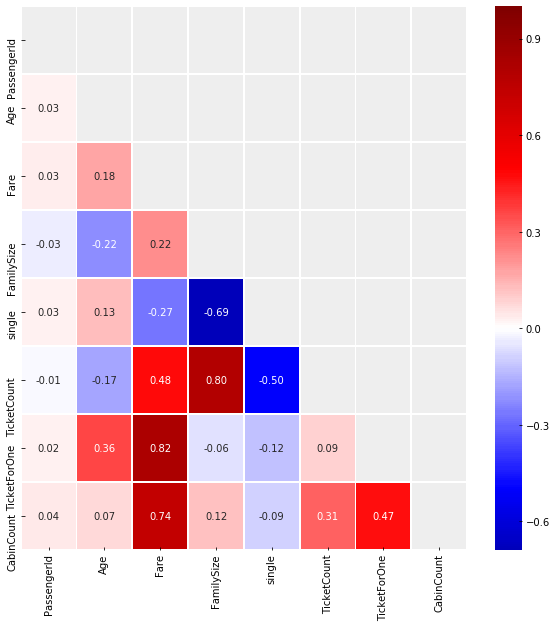

In [519]:
# Adding the mask to the heatmap and see the corr matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cm.seismic, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [520]:
cat_columns = list(all_data.columns[all_data.dtypes == "category"])
for cat in cat_columns:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, all_data[cat].unique().size))

Number of levels in category 'Survived':  3.00 
Number of levels in category 'Pclass':  3.00 
Number of levels in category 'Sex':  2.00 
Number of levels in category 'Embarked':  3.00 
Number of levels in category 'CabinCode':  8.00 
Number of levels in category 'Title':  16.00 


In [521]:
for cat in cat_columns:
    print("Levels for category '{0}': {1}".format(cat, all_data[cat].unique()))

Levels for category 'Survived': [0, 1, 99]
Categories (3, int64): [0, 1, 99]
Levels for category 'Pclass': [3, 1, 2]
Categories (3, int64): [3, 1, 2]
Levels for category 'Sex': [1, 0]
Categories (2, int64): [1, 0]
Levels for category 'Embarked': [S, C, Q]
Categories (3, object): [S, C, Q]
Levels for category 'CabinCode': [E, C, F, G, D, A, B, T]
Categories (8, object): [E, C, F, G, D, A, B, T]
Levels for category 'Title': [Mr, Mrs, Miss, Master, Rev, ..., Mlle, Col, Capt, the Countess, Jonkheer]
Length: 16
Categories (16, object): [Mr, Mrs, Miss, Master, ..., Col, Capt, the Countess, Jonkheer]


## Converting Categorical Columns to dummies using pd.get_dummies

In [522]:
cat_columns = all_data.columns[all_data.dtypes == "category"]

print("Categorical Columns: ", list(cat_columns))

Categorical Columns:  ['Survived', 'Pclass', 'Sex', 'Embarked', 'CabinCode', 'Title']


In [523]:
dummy_cols = ["Title", "Embarked", "CabinCode"]
all_data = pd.get_dummies(all_data, columns=dummy_cols, prefix_sep="_")

# Check Point

In [524]:
#all_data = all_data.drop(train_drop_cols, axis=1)

In [525]:
train = all_data.iloc[:891]
test = all_data.iloc[891:].reset_index(drop=True)

In [526]:
train_drop_cols = ["PassengerId", "Name", "Ticket", "Cabin", "Surname"]
test_drop_cols = ["PassengerId", "Name", "Ticket", "Cabin", "Surname", "Survived"]

In [527]:
train = train.drop(train_drop_cols, axis=1)
test = test.drop(test_drop_cols, axis=1)

In [528]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,FamilySize,single,TicketCount,TicketForOne,CabinCount,Title_Capt,Title_Col,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S,CabinCode_A,CabinCode_B,CabinCode_C,CabinCode_D,CabinCode_E,CabinCode_F,CabinCode_G,CabinCode_T
0,0,3,1,22.0,7.2500,2,0,1,7.25,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,38.0,71.2833,2,0,2,35.64,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [529]:
test.head(2)

,Pclass,Sex,Age,Fare,FamilySize,single,TicketCount,TicketForOne,CabinCount,Title_Capt,Title_Col,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S,CabinCode_A,CabinCode_B,CabinCode_C,CabinCode_D,CabinCode_E,CabinCode_F,CabinCode_G,CabinCode_T
0,3,1,34.5,7.8292,1,1,1,7.83,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,3,0,47.0,7.0000,2,0,1,7.00,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [530]:
column_diff = list(set(train.columns) - set(test.columns))
column_diff

['Survived']

## XGBoost

In [531]:
import xgboost as xgb

In [532]:
#X, y = train_data.iloc[:, :-1], train_data.iloc[:, -1]

In [533]:
#all_data["Sex"] = all_data.Sex.astype("uint8")
#all_data["Pclass"] = all_data.Pclass.astype("uint8")
#all_data["Survived"] = all_data["Survived"].astype("uint8")

In [534]:
train["Sex"] = train.Sex.astype("uint8")
train["Pclass"] = train.Pclass.astype("uint8")

In [535]:
test["Sex"] = test.Sex.astype("uint8")
test["Pclass"] = test.Pclass.astype("uint8")

In [536]:
train["Survived"] = train["Survived"].astype("uint8")

In [537]:
y = train["Survived"]
X = train.drop(["Survived"], axis=1)

## Splitting and Fitting data set

In [538]:
from sklearn.model_selection import train_test_split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=59)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(632, 36) (632,)
(259, 36) (259,)


In [539]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic", n_estimators=21, seed=59)

In [290]:
xgb_cl.fit(X_train, y_train)

print("Score on train data: ", xgb_cl.score(X_test, y_test))

preds = xgb_cl.predict(X_test)

#rmse_xgb_tree = np.sqrt(mean_squared_error(train["Survived"], train["preds"]))
#print("RMSE:", rmse_xgb_tree, "1-RMSE:", 1.0-rmse_xgb_tree)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % accuracy)

Score on train data:  0.7915057915057915
accuracy: 0.791506


### Tuning the XGB Model

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
# Instantiate the classifier: dt_clf_6
dt_clf_6 = DecisionTreeClassifier(max_depth=6)

# Fit the classifier to the training set
dt_clf_6.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_11
y_pred_6 = dt_clf_6.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_6==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.7374517374517374


In [292]:
# Create the DMatrix: survive_dmatrix
survive_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":6}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=survive_dmatrix, params=params, nfold=3, num_boost_round=21, metrics="error", as_pandas=True, seed=59)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

C:\Users\buono\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\buono\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.120090         0.007936         0.178451        0.014285
1           0.113356         0.008286         0.169472        0.018305
2           0.108867         0.009152         0.169472        0.020816
3           0.105500         0.011691         0.171717        0.021472
4           0.105499         0.011111         0.175084        0.023966
5           0.099888         0.005204         0.170595        0.027537
6           0.098205         0.006919         0.168350        0.031224
7           0.095960         0.007142         0.169472        0.032798
8           0.090348         0.004828         0.170595        0.030157
9           0.088665         0.007054         0.169472        0.025984
10          0.084736         0.003968         0.170595        0.027537
11          0.083053         0.005204         0.167228        0.024945
12          0.079686         0.004828         0.171717        0.024435
13    

In [293]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=survive_dmatrix, params=params, nfold=11, num_boost_round=21, metrics="auc", as_pandas=True, seed=59)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.898775       0.005881       0.868050      0.037169
1         0.915431       0.005385       0.870422      0.034830
2         0.926192       0.006871       0.866290      0.041183
3         0.933353       0.006086       0.869331      0.040937
4         0.938171       0.005009       0.870616      0.042330
5         0.943562       0.004800       0.868677      0.040751
6         0.948957       0.005497       0.864024      0.043282
7         0.953358       0.006139       0.863564      0.043387
8         0.956882       0.006101       0.864088      0.042832
9         0.960291       0.004157       0.863879      0.042157
10        0.962268       0.004504       0.862933      0.039813
11        0.964623       0.004851       0.862318      0.039558
12        0.966554       0.004494       0.860982      0.040826
13        0.968355       0.004341       0.859878      0.041067
14        0.969974       0.003596       0.859794      0

## Re Tuning XGB

In [548]:
xgb_model = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=11, 
                      gamma=10)

In [295]:
xgb_model.fit(X_train, y_train)

print("Score on train data: ", xgb_model.score(X_test, y_test))

preds = xgb_model.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % accuracy)

Score on train data:  0.7799227799227799
accuracy: 0.779923


## Submission of the Data

In [557]:
titanic_preds= model.predict(test)

In [558]:
len(titanic_preds)

418

In [559]:
passenger_id = test_data.PassengerId
len(passenger_id)

418

In [560]:
titanic_submission_karaarslan = pd.DataFrame({'PassengerId':passenger_id, 'Survived':titanic_preds})

In [561]:
titanic_submission_karaarslan.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [562]:
titanic_submission_karaarslan.to_csv('Karaarslan_Titanic_09.csv', index=False)

In [302]:
df = pd.read_csv('Karaarslan_Titanic_06.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Random Forest Classifier

In [261]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 180, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [262]:
print("Score on train data: ", model.score(X_test, y_test))

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % accuracy)

Score on train data:  0.7847533632286996
accuracy: 0.784753


In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7932960893854749

In [213]:
RF_pred = model.predict(test)

In [214]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.80      0.71      0.75        79

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

[[86 14]
 [23 56]]


In [215]:
# Feature importance
fi = feat_importance(model, X_train)
fi[:,10]

NameError: name 'feat_importance' is not defined

## Using TPOT to find best model

In [218]:
train.rename(columns = {"Survived": "class"}, inplace = True)

In [219]:
y_tpot = train["class"]
X_tpot = train.drop(["class"], axis=1)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_tpot, y_tpot, test_size=0.33, random_state=59)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(596, 36) (596,)
(295, 36) (295,)


In [222]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

The first and most important step in using TPOT on any data set is to rename the target class/response variable to class.

TPOT requires all the data to be in numerical format. As we can see below, our data set has some categorical variables which contain non-numerical values

## Fitting data into the Model

In [223]:
from tpot import TPOTRegressor

In [224]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="balanced_accuracy", 
                      random_state=23, 
                      periodic_checkpoint_folder="tpot_mnst1.txt", 
                      n_jobs=-1, 
                      generations=10, 
                      population_size=75)

In [225]:
#tpot = TPOTClassifier(verbosity=2, max_time_mins=2, max_eval_time_mins=0.04, population_size=40)
tpot.fit(X_train, y_train)

30 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 55.
_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0))

training data did not have the following fields: f11, f17, f31, f29, f5, f35, f18, f7, f10, f9, f12, f14, f23, f6, f19, f0, f28, f27, f2, f1, f24, f30, f25, f26, f32, f33, f3, f8, f21, f15, f22, f34, f13, f20, f4, f16.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
Generation 6 - Current Pareto front scores:
-1	0.843506880308594	RandomForestClassifier(CombineDFs(input_matrix, input_matrix), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.45, RandomForestClassifier__min_samples_leaf=1, RandomForestClassifier__min_samples_split=14, RandomForestClassifier__n_estimators=100)
-2	0.8484640406513112	ExtraTreesClassifier(RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=10,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder='tpot_mnst1.txt', population_size=75,
        random_state=23, scoring='balanced_accuracy', subsample=1.0,
        template=None, use_dask=False, verbosity=3, warm_start=False)

In [226]:
tpot.score(X_test, y_test)

0.8056470588235294

In [227]:
tpot.export('titanic_pipeline.py')

In [228]:
tr_data = train.rename(columns = {"class": "target"})

In [229]:
tr_data.head()

,target,Pclass,Sex,Age,Fare,FamilySize,single,TicketCount,TicketForOne,CabinCount,Title_Capt,Title_Col,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S,CabinCode_A,CabinCode_B,CabinCode_C,CabinCode_D,CabinCode_E,CabinCode_F,CabinCode_G,CabinCode_T
0,0,3,1,22.0,7.2500,2,0,1,7.25,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,38.0,71.2833,2,0,2,35.64,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,7.9250,1,1,1,7.92,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,2,26.55,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0,8.0500,1,1,1,8.05,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [230]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

In [231]:
# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
X_pot = tr_data.drop('target', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X_pot, tr_data['target'].values, random_state=59)

# Average CV score on the training set was:0.8484640406513112
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=18, n_estimators=100)),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.35000000000000003, min_samples_leaf=13, min_samples_split=6, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [232]:
exported_pipeline.score(X_test, y_test)

0.7847533632286996

## Sklearn - Single tree

In [233]:
import random
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#import xgboost as xgb
#from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

Building a single classifier decision tree with sklearn is easy. You have to provide the list of features that you want the decisions to be made on. Here we give the list of all the features that we have. The multiplication of features comes from the dummy encoding preprocessing that is need for sklearn.

In [263]:
titanic_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)

In [264]:
titanic_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [265]:
print("Score of tree on train data: ", titanic_tree.score(X_test, y_test))

Score of tree on train data:  0.7802690582959642


### Feature importance

In [603]:
X.columns

Index(['Age', 'CabinCode_B', 'CabinCode_C', 'CabinCode_D', 'CabinCode_E',
       'CabinCode_F', 'CabinCode_G', 'CabinCount', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'TicketCount',
       'TicketForOne', 'Title_Col', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess', 'single'],
      dtype='object')

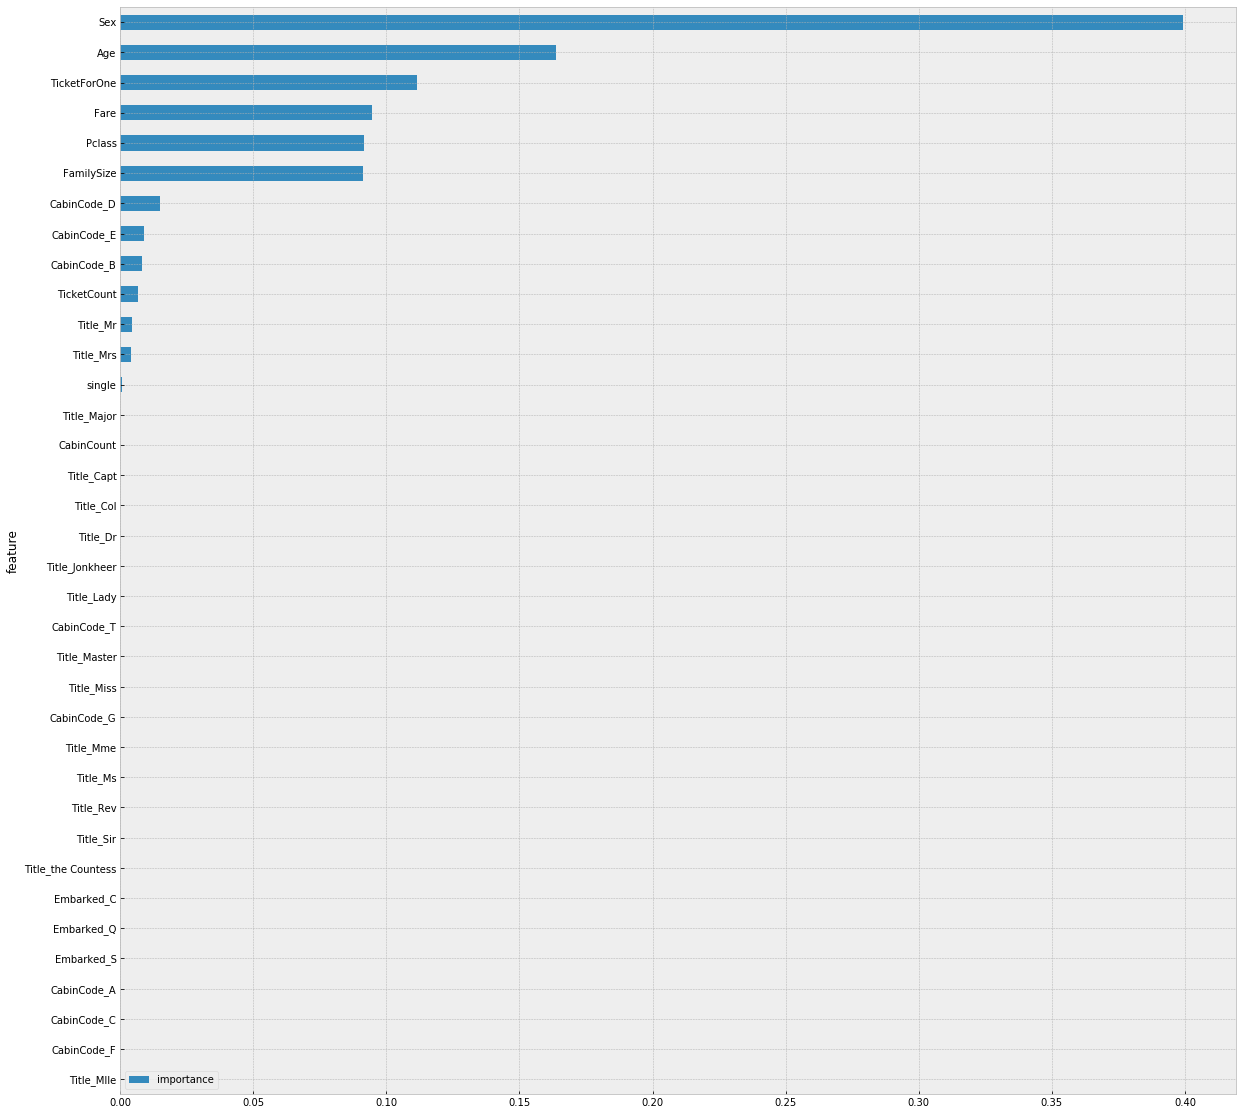

In [240]:
features_imp = pd.DataFrame()
features_imp['feature'] = list(X.columns)
features_imp['importance'] = titanic_tree.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(20, 20))

## Random Forest

Random forest
Instead of getting a decision from one tree, it is possible to get the answer from a panel of trees, that is to say a forest. Each tree in the forest is different and is built around a sample of features. It is always better to get an answer from a diverse jury and this way overfitting is limited.

In [241]:
# The forest will have 50 trees 
# and the max number of features by trees is the square root of the total features number
my_forest = RandomForestClassifier(n_estimators=50, max_features='sqrt')
my_forest = my_forest.fit(X_train, y_train)

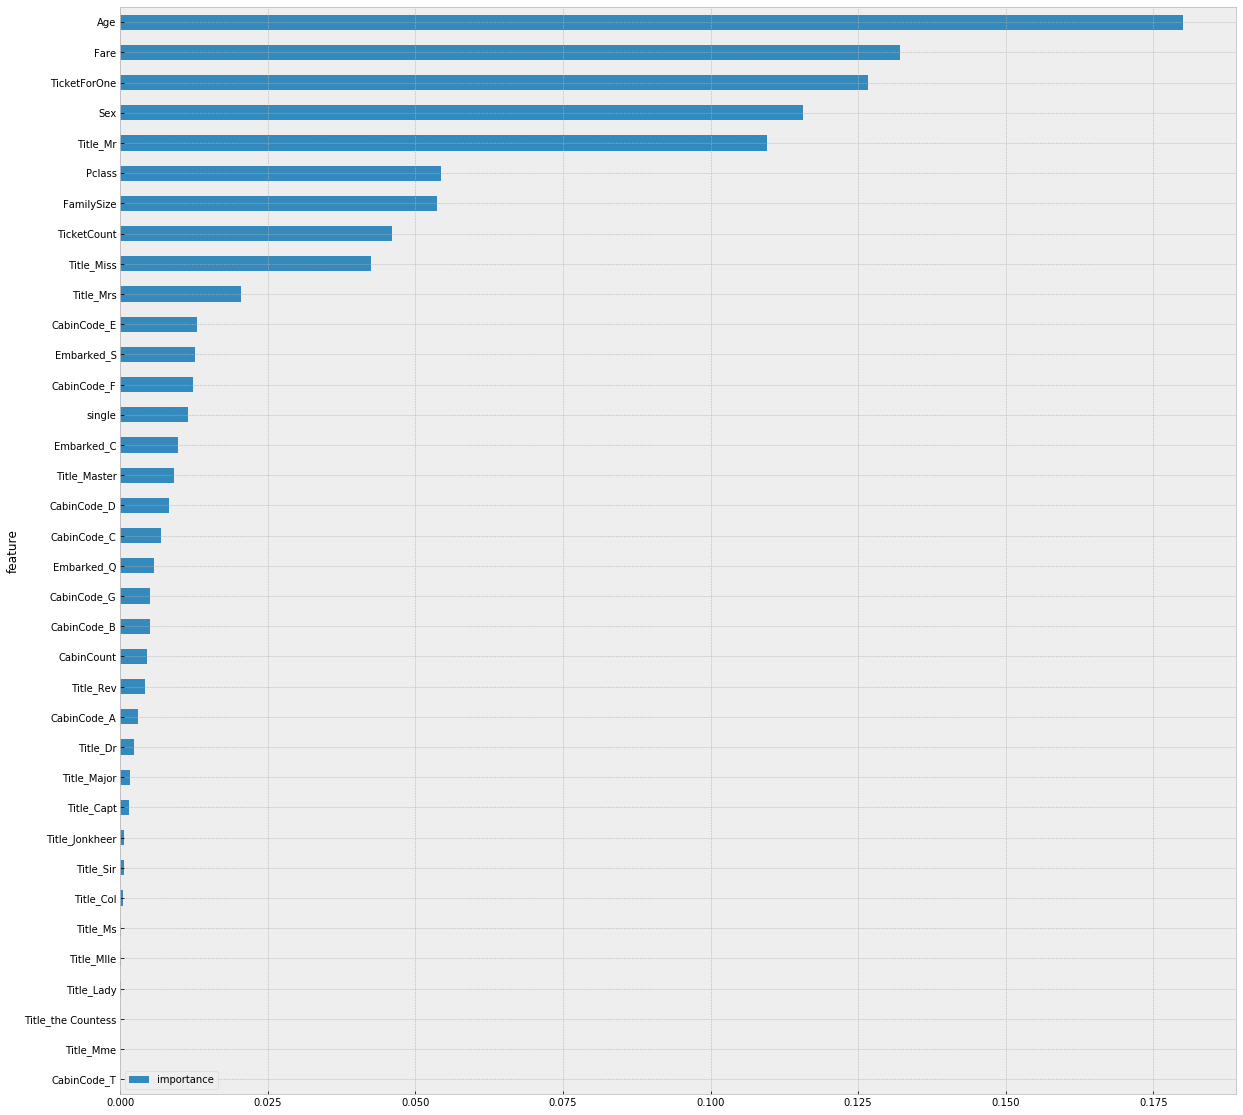

In [242]:
features_imp = pd.DataFrame()
features_imp['feature'] = list(X.columns)
features_imp['importance'] = my_forest.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(20, 20))

In [244]:
print("Score of forest on train data: ", my_forest.score(X_test, y_test))

#tr_data["eval_forest"] = my_forest.predict(X_test)

#rmse_tree = np.sqrt(mean_squared_error(tr_data["target"], tr_data["eval_forest"]))
#print("RMSE:", rmse_tree)

Score of forest on train data:  0.7668161434977578


## Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier

#Create classifier object with default hyperparameters
clf = DecisionTreeClassifier()  

#Fit our classifier using the training features and the training target values
clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [246]:
predictions = clf.predict(X_test)

In [247]:
clf.score(X_test, y_test)

0.7399103139013453

In [ ]:
#sur_title = y.groupby(["Surname"])
#for surname, sur_grp in sur_title:
#    print("\nFamily: {}".format(surname))
#    
#    for row_index, row in sur_grp.iterrows():
#        title = row["Title"]
#        age = "Not Known" if  np.isnan(row["Age"]) else row["Age"]
#        print("\t{} {} {}".format(title, age, len(sur_grp)))

In [ ]:
#for surname, sur_grp in sur_title:
#    if surname in can_impute:
#        to_use[surname] = {}
#        to_fill[surname] = {}
#        for row_index, row in sur_grp.iterrows():
#            if np.isnan(row["Age"]):
#                to_fill[surname][row["Title"]] = [0, row_index]
#            else:
#                to_use[surname][row["Title"]] = row["Age"]